In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import copy as cp
from itertools import chain,cycle
from IPython.display import display_html
#Tratamento de warnings
import warnings
warnings.filterwarnings('ignore')
from random import sample
from dateutil.relativedelta import relativedelta

In [2]:
# essa função cria uma visualização de vários dataframes em uma única saída
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h3>{title}</h3>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

In [3]:
df = pd.read_csv('data-test-analytics.csv')

# Tratamento inicial das variáveis da base de dados

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  10000 non-null  object 
 1   created_at          10000 non-null  object 
 2   updated_at          10000 non-null  object 
 3   deleted_at          505 non-null    object 
 4   name_hash           10000 non-null  object 
 5   email_hash          10000 non-null  object 
 6   address_hash        10000 non-null  object 
 7   birth_date          10000 non-null  object 
 8   status              10000 non-null  object 
 9   version             10000 non-null  object 
 10  city                10000 non-null  object 
 11  state               10000 non-null  object 
 12  neighborhood        10000 non-null  object 
 13  last_date_purchase  10000 non-null  object 
 14  average_ticket      10000 non-null  float64
 15  items_quantity      10000 non-null  int64  
 16  all_r

In [5]:
df.head()

,id,created_at,updated_at,deleted_at,name_hash,email_hash,address_hash,birth_date,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source
0,8bf7960e-3b93-468b-856e-6c6c5b56f52b,08/15/17 07:05 AM,01/14/21 11:23 AM,NaN,312d206168a318614897e8ccac43bff9,83eb3aed9a44377df80ce876dce92c9a,8b4bfaa0cbc41a16f46da15ddcd6a907,07/10/74 12:00 AM,active,2.31.7,Peixoto da Praia,AM,Aparecida 7ª Seção,01/14/21 11:23 AM,151.142942,10,906.857651,6,35,crm
1,a39535b5-4647-4680-b4f6-3aed57c1f1ff,12/31/19 09:53 PM,01/08/21 11:23 AM,NaN,de448fcb47d0d6a873b2eef52b5ee595,72678bb35e2ac84ed373e81dd9dca28c,22f1cfa1847f38da3f3cb114dd2b9247,07/06/40 12:00 AM,paused,3.30.12,Fernandes,RR,Santa Isabel,01/08/21 11:23 AM,236.991790,4,236.991790,1,41,organic_search
2,dc067cd2-c021-42bd-8c0e-beb267280e66,03/07/19 11:46 PM,01/07/21 11:23 AM,NaN,cb09e447ddc38283373d56bb46498e6a,668f4ee9add29c7bd02c485f1b7509e3,6cb47446a086ee6483b3eb954f11467a,03/18/63 12:00 AM,active,3.28.9,Lopes,RR,Estrela,01/07/21 11:23 AM,211.955597,13,2331.511572,11,42,organic_search
3,b5e4caeb-3a9b-49ed-aa33-5acd06b162c1,07/21/18 10:17 AM,01/10/21 11:23 AM,NaN,52593437a405b11b3557170680ef80c8,d3fb45188d95c8d7cc49da5b4f727c86,0a6f0c54db1e6f19347f96b50f8092a4,11/21/80 12:00 AM,active,3.34.3,Campos do Campo,PE,Confisco,01/10/21 11:23 AM,204.113227,8,1224.679359,6,39,organic_search
4,d4ff61fc-f008-4e19-b8ae-bd70cfa3ae27,06/08/18 12:09 PM,01/18/21 11:23 AM,NaN,dbda4b778a966c21904238ed2d2005db,a0f76bc49b4c43327b536da6e1a1465e,143b9f169b4fa1692f6d79b5682169b5,07/07/59 12:00 AM,active,3.19.8,das Neves,RJ,Vila Suzana Segunda Seção,01/18/21 11:23 AM,252.940997,9,2023.527980,8,31,crm


In [6]:
# verificando que os IDs são únicos de fato
df['id'].nunique(),df.shape[0]

(10000, 10000)

In [7]:
df.columns

Index(['id', 'created_at', 'updated_at', 'deleted_at', 'name_hash',
       'email_hash', 'address_hash', 'birth_date', 'status', 'version', 'city',
       'state', 'neighborhood', 'last_date_purchase', 'average_ticket',
       'items_quantity', 'all_revenue', 'all_orders', 'recency',
       'marketing_source'],
      dtype='object')

In [8]:
# passando as colunas de data para formato datetime
columns_data = ['created_at', 'updated_at', 'deleted_at','birth_date','last_date_purchase']
df[columns_data] = df[columns_data].apply(lambda x: pd.to_datetime(x))

In [9]:
df[columns_data].apply(lambda x: x.describe())

,created_at,updated_at,deleted_at,birth_date,last_date_purchase
count,10000,10000,505,10000,10000
mean,2018-08-12 05:40:22.464000,2020-12-25 06:06:27.533999616,2019-12-02 14:16:21.861385984,2026-09-11 14:43:26.400000,2020-12-13 06:09:13.463999488
min,2016-02-19 10:00:00,2016-05-02 13:46:00,2016-05-02 13:46:00,1973-01-03 00:00:00,2016-02-25 03:48:00
25%,2017-05-15 11:42:00,2021-01-10 11:23:00,2019-04-04 11:10:00,1986-08-29 06:00:00,2021-01-10 11:23:00
50%,2018-08-09 21:42:00,2021-01-14 11:23:00,2020-04-16 15:38:00,2044-11-07 12:00:00,2021-01-14 11:23:00
75%,2019-11-04 17:18:30,2021-01-18 11:23:00,2020-11-02 21:59:00,2059-04-30 00:00:00,2021-01-18 11:23:00
max,2021-02-18 05:04:00,2021-02-17 22:19:00,2021-02-17 22:19:00,2072-12-31 00:00:00,2021-02-16 19:46:00


A coluna "birth_date" ficou com algumas datas incorretas na transformação para datetime. Então, iremos corrigir criando uma função para tratamento desses erros.

In [10]:
# definindo a função para tratar os anos
def tratar_datas_incorretas(date):
    ano = date.year
    if ano > 2021:
        ano = ano - 100
        date = date.replace(year=ano)
    return pd.to_datetime(date)

*Observação: Para criação de algumas colunas de data como aniversário, tempo de assinatura e etc, vou utilizar como base a última data de created_at que é de '2021-02-19'. Se fosse utilizado o dia de hoje, ficaria muita diferença entre as quantidades de dias/meses reias, já que a base não é muito atualizada.* 

In [11]:
# aplicando a função à coluna de data de aniversário
df['birth_date'] = pd.to_datetime(df['birth_date'].apply(tratar_datas_incorretas))

In [12]:
df['birth_date'].max()

Timestamp('1996-02-14 00:00:00')

In [13]:
df['status'].value_counts()

status
active      8524
paused       971
canceled     505
Name: count, dtype: int64

In [14]:
# verificando se os cancelados estão com a data de exclusão
df[~df['deleted_at'].isnull()]['status'].unique(),df[df['deleted_at'].isnull()]['status'].unique()
# tá tudo certo, o que tem data de exclusão tem status de cancelado e o que não tem data de exclusão tem os outros status

(array(['canceled'], dtype=object), array(['active', 'paused'], dtype=object))

In [15]:
print(list(df['city'].unique()))

[' Peixoto da Praia', ' Fernandes', ' Lopes', ' Campos do Campo', ' das Neves', ' Aragão', ' Pereira Grande', ' Fernandes Alegre', ' Cardoso do Sul', ' Barros das Flores', ' Fernandes de Goiás', ' Moreira do Galho', ' Pinto', ' da Cruz Verde', ' da Mota da Prata', ' Aragão da Serra', ' Moraes das Flores', ' da Rosa', ' Vieira', ' Nunes', ' Araújo da Serra', ' Ferreira Alegre', ' Viana da Prata', ' Peixoto', ' Moreira de Goiás', ' Peixoto de Costela', ' da Luz Alegre', ' da Mota Verde', ' Novaes', ' Ramos', ' Dias do Sul', ' Castro de Ramos', ' Almeida', ' Pereira da Mata', ' Correia do Galho', ' Jesus', ' Caldeira de Mendes', ' Rezende do Galho', ' Barbosa do Oeste', ' Monteiro', ' Ferreira de Correia', ' Silva do Sul', ' Farias', ' Lima', ' da Costa', ' Oliveira', ' Duarte', ' da Mota do Norte', ' da Mota de Carvalho', ' da Cruz de Goiás', ' Cardoso das Flores', ' da Mota', ' da Rocha da Prata', ' Azevedo da Prata', ' Santos', ' Monteiro de Monteiro', ' Novaes de Minas', ' Caldeira do

In [16]:
print(list(df['state'].unique()))

['AM', 'RR', 'PE', 'RJ', 'MT', 'SC', 'PR', 'PB', 'AP', 'SP', 'MG', 'MA', 'AL', 'PI', 'RO', 'AC', 'CE', 'RN', 'MS', 'PA', 'ES', 'SE', 'RS', 'DF', 'BA', 'GO', 'TO']


In [17]:
print(list(df['neighborhood'].unique()))

['Aparecida 7ª Seção', 'Santa Isabel', 'Estrela', 'Confisco', 'Vila Suzana Segunda Seção', 'Vila Maria', 'Braúnas', 'Bacurau', 'Piraja', 'Padre Eustáquio', 'Jardim Guanabara', 'Vila Paris', 'Ipe', 'Jardim Dos Comerciarios', 'Granja Werneck', 'Vila Independencia 1ª Seção', 'São João Batista', 'Monsenhor Messias', 'Céu Azul', 'Dona Clara', 'Primeiro De Maio', 'Túnel De Ibirité', 'Nossa Senhora De Fátima', 'Santa Rita De Cássia', 'Universo', 'Flavio De Oliveira', 'Dom Cabral', 'Estoril', 'Cenaculo', 'Copacabana', 'Savassi', 'Vila Madre Gertrudes 3ª Seção', 'Conjunto Floramar', 'Conjunto Capitão Eduardo', 'Vila Ouro Minas', 'Conjunto Paulo Vi', 'Vila Batik', 'Pompéia', 'Senhor Dos Passos', 'Ribeiro De Abreu', 'Ventosa', 'Candelaria', 'Buritis', 'Venda Nova', 'Vila Nova Paraíso', 'Santa Rita', 'Glória', 'Cachoeirinha', 'Vila Real 2ª Seção', 'Conjunto Bonsucesso', 'Universitário', 'Grota', 'Marajó', 'Inconfidência', 'Vila São João Batista', 'Boa União 1ª Seção', 'Vila Independencia 3ª Seção'

In [18]:
df[['average_ticket','items_quantity', 'all_revenue', 'all_orders', 'recency']].describe()

,average_ticket,items_quantity,all_revenue,all_orders,recency
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,216.894709,8.49980,1174.888603,5.415400,67.192900
std,22.757213,3.02604,763.141973,3.457577,175.723276
min,131.378672,1.00000,0.000000,0.000000,1.000000
25%,201.398851,6.00000,494.873564,2.000000,31.000000
50%,217.019478,8.00000,1172.751918,5.000000,35.000000
75%,232.455042,11.00000,1798.475045,8.000000,39.000000
max,303.386848,19.00000,3225.654163,11.000000,1820.000000


In [19]:
df['marketing_source'].unique()

array(['crm', 'organic_search', 'direct', 'paid_search', 'none',
       'telegram_whatsapp'], dtype=object)

# Análise exploratória

### Criação de colunas para realizar as análises

In [20]:
# criando colunas para acrescentar a informação de dia da semana e mês de cancelamento
def weekday_month_day_year(df, coluna_data,weekday,month,day,year):
    # dia da semana
    df[weekday] = pd.to_datetime(df[coluna_data]).dt.day_name()
    #  mês
    df[month] = pd.to_datetime(df[coluna_data]).dt.month_name()
    # dia do mês
    df[day] = pd.to_datetime(df[coluna_data]).dt.day
    # ano
    df[year] = pd.to_datetime(df[coluna_data]).dt.year
    return df

In [21]:
# criando as colunas pela função para criação da assinatura
df = weekday_month_day_year(df,'deleted_at','deleted_at_weekday','deleted_at_month','deleted_at_day','deleted_at_year')

In [22]:
# criando as colunas pela função para exclusão  da assinatura
df = weekday_month_day_year(df,'created_at','created_at_weekday','created_at_month','created_at_day','created_at_year')

In [23]:
# criando uma coluna de idade
df['customer_age'] = [relativedelta(pd.to_datetime('2021-02-19',format='%Y-%m-%d'),date).years for date in df['birth_date']]

In [24]:
# tempo que o cliente demorou pra cancelar depois da última compra
df['recency_subs'] = (df['deleted_at'] - df['last_date_purchase']).dt.days

In [25]:
# coluna que informa quanto tempo o cliente ficou no plano de assinatura
def calculate_subscription_time(row):
    if pd.isnull(row['deleted_at']):
        a = (pd.to_datetime('2021-02-19',format='%Y-%m-%d') - row['created_at']).days
        return round(a/30)
    else:
        a = (row['deleted_at'] - row['created_at']).days
        return round(a/30)
# aplica a função 
df['subs_time'] = df.apply(calculate_subscription_time, axis=1)

In [26]:
# criando lista de faixa etária, como a pessoa com mais idade tem 81 colocamos até 90 a última faixa
age_group = [20,30,40,50,60,70,81]
df['age_group'] = pd.cut(df['customer_age'], bins=age_group)
# trasnformando a coluna de faixa etaria em string
df['age_group'] = df['age_group'].astype(str)

In [27]:
# criando coluna de região para analisar posteriormente
region = {
    'Norte': ['AM', 'AC', 'AP', 'PA', 'RO', 'RR', 'TO'],
    'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
    'Centro-Oeste': ['DF', 'GO', 'MT', 'MS'],
    'Sudeste': ['ES', 'MG', 'RJ', 'SP'],
    'Sul': ['PR', 'RS', 'SC']
}
# adicionando a coluna de região ao dataframe
df['region'] = df['state'].map({state: region for region, states in region.items() for state in states})

In [28]:
# criar variavel de 0 e 1 pro churn
df['churn'] = ['yes' if i[list(df.columns).index('status')]=='canceled' else 'no' for i in df.itertuples(index=False)]

Mapeamento da análise  
- Em que momento do mês os clientes costumam cancelar? Há um padrão neste comportamento? 
- Há um padrão no dia da semana que os clientes costumam cancelar? Fim de semana ou dia de semana? 
- Como é o comportamento do cancelamento ao longo dos meses? Há um padrão comparando os diferentes anos? 
- Quanto tempo o cliente que deu churn ficou com a assinatura ativa? 
- Os clientes costumam ficar muito tempo sem comprar antes de dar o churn? 
- Alguma faixa de idade o cancelamento é maior? 
- Quanto tempo cada faixa etária fica com a assinatura? 
- Clientes vindos de algum canal de marketing tem um índice de churn consideravelmente maior que os outros? 
- Os clientes têm comportamento diferente dependendo de sua região de origem?
- A média maior de gasto por pedido influencia no churn? 
- Quem cancela mais, quem tem média de itens comprados maior ou menor? 
- As pessoas que têm um total de receita gasto maior cancelam mais? Ou as que têm total de receita gasto menor? 
- As pessoas que têm mais pedidos ou menos que mais cancelam? 
 

### Analise do churn no geral

In [29]:
# taxa de churn
print('A taxa de churn global da empresa é de',round(100*df.query('churn=="yes"').shape[0]/df.shape[0],2),"%.")

A taxa de churn global da empresa é de 5.05 %.


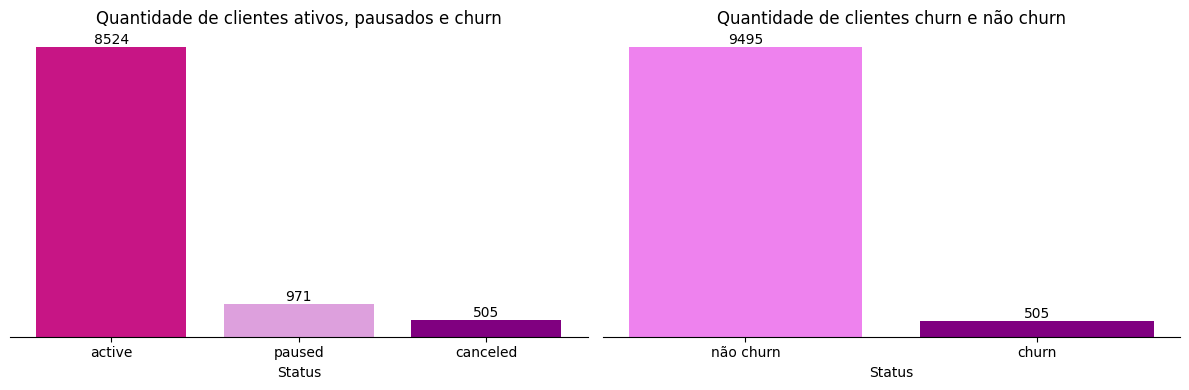

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# plotar o primeiro gráfico com as contagens de cada status
counts = df['status'].value_counts()
axs[0].bar(counts.index, counts.values, color=['mediumvioletred','plum','purple'])
axs[0].set_xlabel('Status')
axs[0].set_title('Quantidade de clientes ativos, pausados e churn')
axs[0].spines['top'].set_visible(False) # remove a linha superior do gráfico
axs[0].spines['right'].set_visible(False) # remove a linha direita do gráfico
axs[0].spines['left'].set_visible(False) # remove a linha esquerda do gráfico
axs[0].set_yticks([])
for i, v in enumerate(counts.values):
    axs[0].text(i, v, str(v), ha='center', va='bottom')

# plotar o segundo gráfico com a soma das contagens de 'active' e 'paused' e 'canceled'
counts = df.groupby('churn')['id'].count()
axs[1].bar(['não churn', 'churn'], counts.values, color=['violet','purple'])
axs[1].set_xlabel('Status')
axs[1].set_title('Quantidade de clientes churn e não churn')
axs[1].spines['top'].set_visible(False) # remove a linha superior do gráfico
axs[1].spines['right'].set_visible(False) # remove a linha direita do gráfico
axs[1].spines['left'].set_visible(False) # remove a linha esquerda do gráfico
axs[1].set_yticks([])
for i, v in enumerate(counts.values):
    axs[1].text(i, v, str(v), ha='center', va='bottom')

fig.tight_layout()
plt.show()

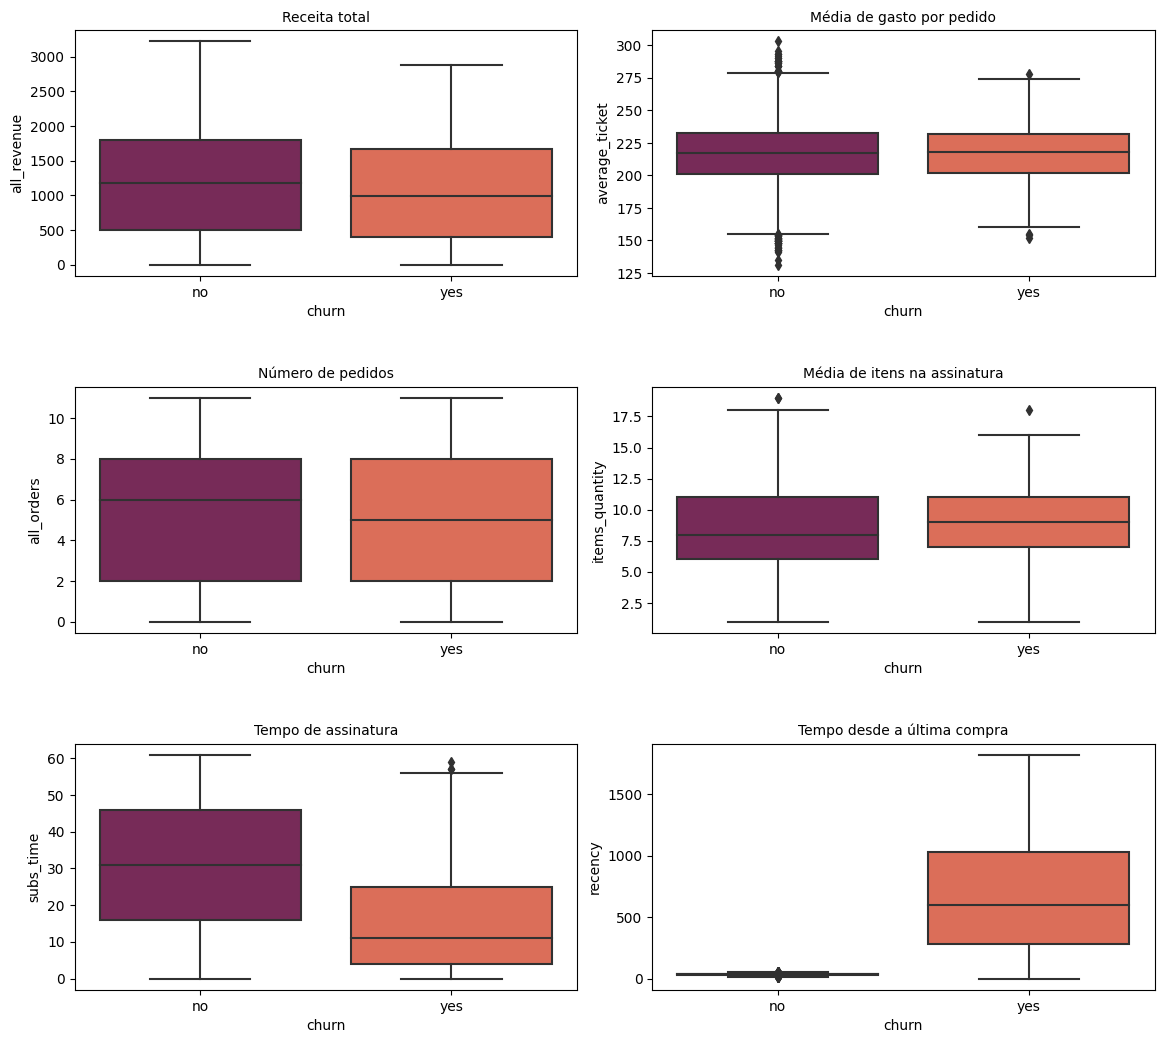

In [31]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

sns.boxplot(x='churn', y='all_revenue', data=df, ax=axes[0, 0],  palette="rocket")
axes[0, 0].set_title('Receita total',fontsize=10)

sns.boxplot(x='churn', y='average_ticket', data=df, ax=axes[0, 1], palette="rocket")
axes[0, 1].set_title('Média de gasto por pedido',fontsize=10)

sns.boxplot(x='churn', y='all_orders', data=df, ax=axes[1, 0],  palette="rocket")
axes[1, 0].set_title('Número de pedidos',fontsize=10)

sns.boxplot(x='churn', y='items_quantity', data=df, ax=axes[1, 1], palette="rocket")
axes[1, 1].set_title('Média de itens na assinatura',fontsize=10)

sns.boxplot(x='churn', y='subs_time', data=df, ax=axes[2, 0], palette="rocket")
axes[2, 0].set_title('Tempo de assinatura',fontsize=10)

sns.boxplot(x='churn', y='recency', data=df, ax=axes[2, 1], palette="rocket")
axes[2, 1].set_title('Tempo desde a última compra',fontsize=10)

plt.subplots_adjust(left=0, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.45)
plt.show()

In [32]:
# para enxergar melhor os valores do último boxplot
df.groupby('churn')['recency'].describe()

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
no,9495.0,34.548605,6.049331,11.0,30.0,35.0,39.0,56.0
yes,505.0,680.970297,463.006656,1.0,278.0,600.0,1031.0,1820.0


#### Resumo
As variáveis acima plotadas para clientes que deram churn e que não deram churn tem comportamento bastante parecido. Ou seja, clientes que cancelaram a assinatura gastaram e compraram quantidades muito próximas àqueles que não cancelaram, não havendo uma diferença aparente. O problema do cancelamento, aparentemente, não é uma falta de uso da assinatura, ou alguma insatisfação com preços. Apenas no tempo de assinatura que os clientes que cancelaram tem uma mediana menor, porém isso pode ser devido a base pequena.

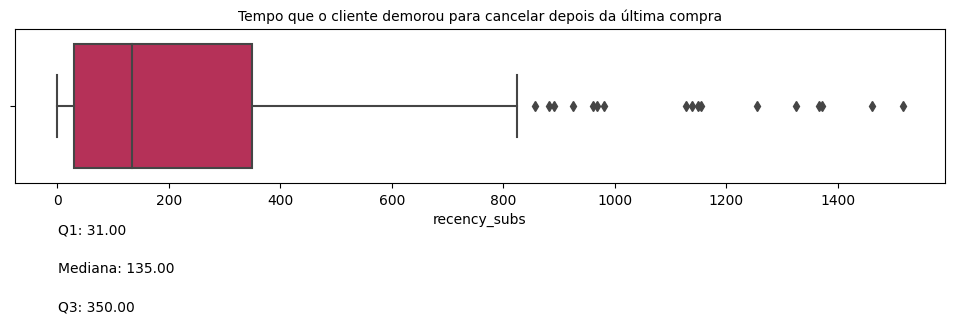

In [33]:
fig, ax = plt.subplots(figsize=(12, 2)) 
sns.boxplot(x=df['recency_subs'], palette="rocket", ax=ax)
ax.set_title('Tempo que o cliente demorou para cancelar depois da última compra',fontsize=10)


# Calcula os valores dos quartis e da média
q1, mediana, q3 = np.percentile(df.query('churn=="yes"')['recency_subs'], [25, 50, 75])

# definindo as posições das anotações
x_pos = 1.05
y_pos_mediana = ax.get_ylim()[0] + (ax.get_ylim()[1] - ax.get_ylim()[0]) * -0.6
y_pos_q1 = ax.get_ylim()[0] + (ax.get_ylim()[1] - ax.get_ylim()[0]) * -0.35
y_pos_q3 = ax.get_ylim()[0] + (ax.get_ylim()[1] - ax.get_ylim()[0]) * -0.85

# adicionando as anotações
ax.text(x_pos, y_pos_mediana, f'Mediana: {mediana:.2f}', verticalalignment='bottom', horizontalalignment='left')
ax.text(x_pos, y_pos_q1, f'Q1: {q1:.2f}', verticalalignment='bottom', horizontalalignment='left')
ax.text(x_pos, y_pos_q3, f'Q3: {q3:.2f}', verticalalignment='bottom', horizontalalignment='left')
plt.show()

Acima, vemos que metade dos clientes ficam até 135 dias (4 meses e meio) sem comprar antes de fazer o cancelamento.  Há a possibilidade da interrupção da assinatura por falsa de uso, já que os clientes esperam um tempo considerável para cancelar depois de ter feito a última compra pela assintaura. Neste caso, poderiam ser tomadas ações que incentivassem a compra, como cupons, descontos progressivos, programas de pontos e coisas do tipo.

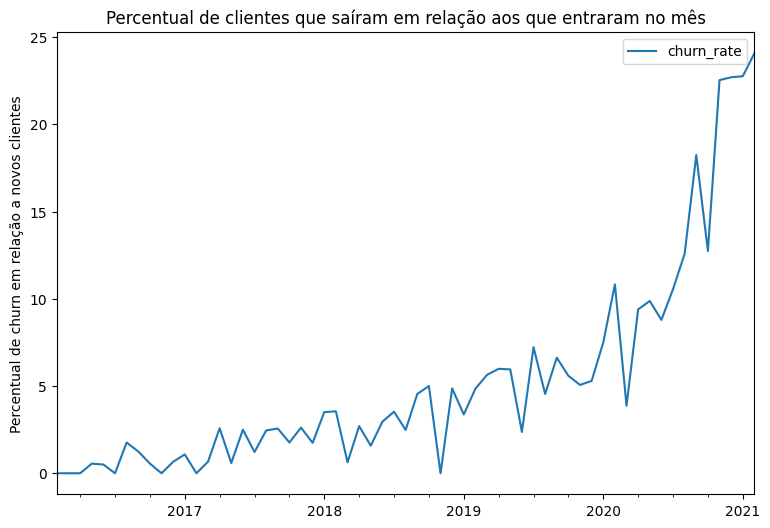

In [34]:
df1 = df[['created_at','deleted_at']]

# Cria uma coluna com o mês e o ano de assinatura e cancelamento
df1['signup_month'] = df1['created_at'].dt.to_period('M')
df1['cancel_month'] = df1['deleted_at'].dt.to_period('M')

# Agrupa os dados pelo mês e ano de assinatura e de cancelamento
signup_counts = df1.groupby('signup_month').size().reset_index(name='signup_count')
cancel_counts = df1.groupby('cancel_month').size().reset_index(name='cancel_count')

# Junta as contagens de assinaturas e cancelamentos em um único DataFrame e calcula o % de churn
result = pd.merge(signup_counts, cancel_counts, how='outer', left_on='signup_month', right_on='cancel_month').fillna(0)
result['churn_rate'] = result['cancel_count'] / result['signup_count'] * 100

# Plota o gráfico de percentual de churn ao longo dos meses
ax = result.plot(x='signup_month', y='churn_rate', kind='line', figsize=(9, 6))
ax.set_ylabel('Percentual de churn em relação a novos clientes')
ax.set_xlabel(None)
plt.title('Percentual de clientes que saíram em relação aos que entraram no mês')
plt.show()

No gráfico acima se observa uma tendência preocupante, onde vemos que cada vez mais aumenta o percentual de clientes que deram churn em razão dos novos clientes. Por exemplo, em fevereiro de 2021 tivemos 108 novos clientes e 26 churns na nossa base de cliente. A preocupação é que, chegue em um momento em que entre a mesma quantidade de clientes novos que saiam os antigos por conta do churn.

### Duração de assinatura e churn

In [35]:
# criando dataframe com meses de assinatura e quantidade de cada status
table_subs_time = df.pivot_table(values = 'id', index = ['subs_time'], columns = 'status',
    aggfunc='count').fillna(0).reset_index().rename_axis(index=None, columns= None)
# transformando float em int
columns_int = ['active','canceled','paused']
table_subs_time[columns_int] = table_subs_time[columns_int].apply(lambda x: x.astype(int))

In [36]:
# coluna de acumulado de quantidade de churn
table_subs_time['cumulative_canceled'] = table_subs_time['canceled'].cumsum()

In [37]:
# cortando o dataframe onde não soma mais o acumulado do churn
table_subs_time = table_subs_time.head(60)
# coluna de acumulado percentual
table_subs_time['cumulative_canceled_perc'] = round(100*
                            table_subs_time['cumulative_canceled'] / table_subs_time['cumulative_canceled'].max(),2)

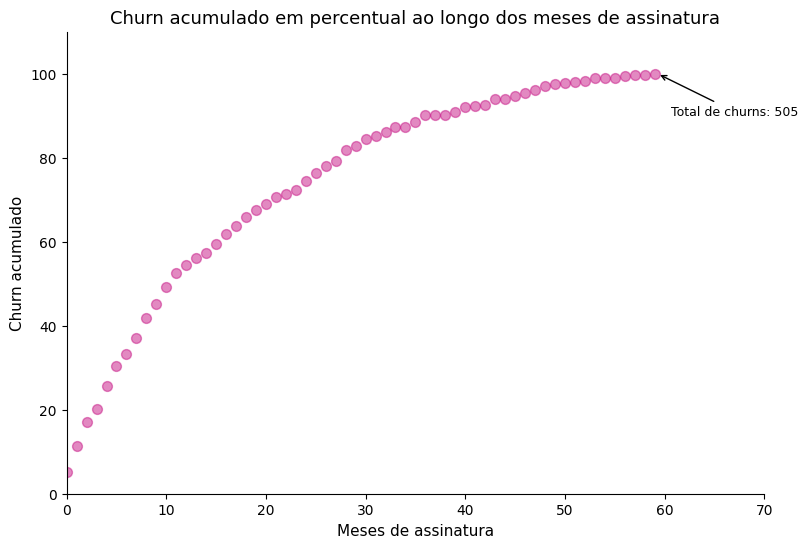

In [38]:
# plotar gráfico de dispersão
fig, ax = plt.subplots(figsize=(9, 6)) 
ax.scatter(table_subs_time['subs_time'], table_subs_time['cumulative_canceled_perc'], s=50, alpha=0.5, color='mediumvioletred') # tamanho, transparência e cor dos pontos
ax.set_xlabel('Meses de assinatura', fontsize=11) 
ax.set_ylabel('Churn acumulado', fontsize=11) 
ax.set_xlim(0, 70)
ax.set_ylim(0, 110) 
ax.spines['top'].set_visible(False) # remove a linha superior do gráfico
ax.spines['right'].set_visible(False) # remove a linha direita do gráfico
plt.title("Churn acumulado em percentual ao longo dos meses de assinatura",fontsize=13)

# adicionar anotação no gráfico
x_pos = table_subs_time['subs_time'].iloc[-1] + 0.3 # posição x da seta (ligeramente à direita do último ponto)
y_pos = table_subs_time['cumulative_canceled_perc'].iloc[-1] # posição y da seta (no valor total de churn)
ax.annotate(f'Total de churns: 505', xy=(x_pos, y_pos), xytext=(10, -30), textcoords='offset points', fontsize=9,
            arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.show()

In [39]:
table_subs_time.tail(5)

,subs_time,active,canceled,paused,cumulative_canceled,cumulative_canceled_perc
55,55,136,0,16,500,99.01
56,56,152,2,13,502,99.41
57,57,157,2,29,504,99.80
58,58,159,0,17,504,99.80
59,59,119,1,17,505,100.00


#### Resumo
A partir do gráfico plotado acima, vemos mais claramente que metade dos clientes - aproximadamente - costumam cancelar a assinatura com até 10 meses de utilização do serviço.  Precisamos entender o que faz o cliente desistir do serviço com tão pouco tempo de uso. 

### Idade

In [40]:
# criar df agrupando por idade e somando clientes total e clientes que cancelaram
table_customer_age = df.groupby('age_group').agg(**{
    'total':pd.NamedAgg(column='id',aggfunc='count'),
    'deleted_at_total':pd.NamedAgg(column='deleted_at',aggfunc='count'),
    'subs_time':pd.NamedAgg(column='subs_time',aggfunc='median'),
    'average_ticket':pd.NamedAgg(column='average_ticket',aggfunc='median'),
    'items_quantity':pd.NamedAgg(column='items_quantity',aggfunc='median'),
    'all_revenue':pd.NamedAgg(column='all_revenue',aggfunc='median'),
    'all_orders':pd.NamedAgg(column='all_orders',aggfunc='median'),
    'recency':pd.NamedAgg(column='recency',aggfunc='median')
    })
table_customer_age['perc_deleted_at'] = round(100*table_customer_age['deleted_at_total']/table_customer_age['total'],2)

*Observação: Decidi utilizar como parâmetro as medianas dos valores, pois elas representam melhor o comportamento de cada variável. A média acaba sendo bastante afetada por valores extremos.*  

In [41]:
table_customer_age.head()

,total,deleted_at_total,subs_time,average_ticket,items_quantity,all_revenue,all_orders,recency,perc_deleted_at
age_group,,,,,,,,,
"(20, 30]",1046,64,29.0,217.368011,8.0,1201.966672,6.0,35.0,6.12
"(30, 40]",1775,74,29.0,216.753089,8.0,1141.867197,5.0,35.0,4.17
"(40, 50]",1823,88,30.0,216.650056,8.0,1179.250679,5.0,35.0,4.83
"(50, 60]",1839,100,30.0,217.331461,9.0,1174.634236,6.0,35.0,5.44
"(60, 70]",1763,91,29.0,217.147497,9.0,1175.125174,5.0,35.0,5.16


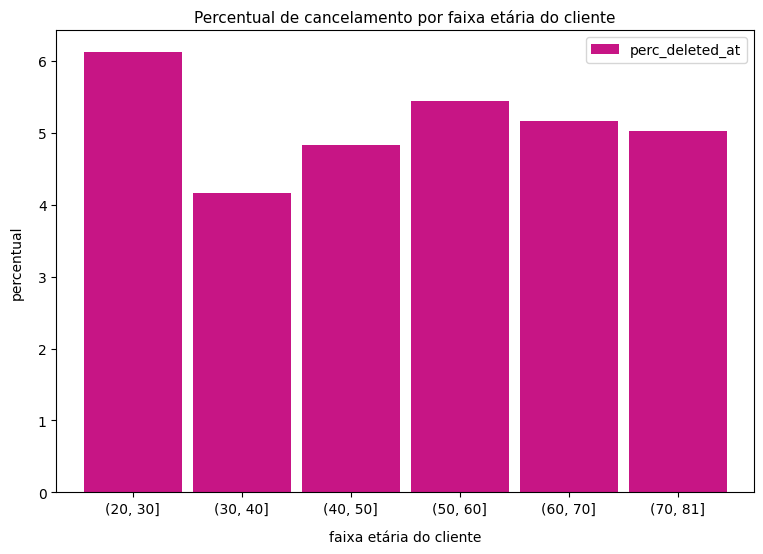

In [42]:
fig,ax= plt.subplots()
table_customer_age[['perc_deleted_at']].plot(
    kind="bar", ax=ax, width=0.9, color='mediumvioletred',figsize=(9,6))
plt.title('Percentual de cancelamento por faixa etária do cliente', fontsize=11) 
plt.ylabel('percentual', labelpad=10)
plt.xlabel('faixa etária do cliente', labelpad=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

In [43]:
# criando tabela de percentual de faixa etaria no cancelamneto
aux_1 = df.query('churn=="yes"')['age_group'].value_counts(normalize=True).to_frame().reset_index()
aux_1['proportion'] = round(100*aux_1['proportion'],2)
# criando tabela de percentual de faixa etaria no total
aux_2 = df['age_group'].value_counts(normalize=True).to_frame().reset_index()
aux_2['proportion'] = round(100*aux_2['proportion'],2)
# plotando o merge destas tabelas para comparação
aux_3 = aux_2.merge(aux_1,how='inner',on='age_group').rename(columns={'proportion_x':'perc_customers',
                                                              'proportion_y':'perc_customers_deleted'})
aux_3['dif'] = aux_3['perc_customers_deleted']-aux_3['perc_customers']
display_side_by_side( aux_3.rename(columns={'age_group':'faixa etária','perc_customers':'percentual de clientes',
                                            'perc_customers_deleted':'percentual de clientes churn','dif':'diferença de percentual'}),
                     titles=['Percentual de clientes em cada faixa etária na nossa base de clientes e no cancelamento'])

,faixa etária,percentual de clientes,percentual de clientes churn,diferença de percentual
0,"(50, 60]",18.39,19.80,1.41
1,"(40, 50]",18.23,17.43,-0.80
2,"(30, 40]",17.75,14.65,-3.10
3,"(60, 70]",17.63,18.02,0.39
4,"(70, 81]",17.54,17.43,-0.11
5,"(20, 30]",10.46,12.67,2.21


Através do gráfico conseguimos identificar uma maior taxa de cancelamento dentro da faixa etária mais jovem (clientes de 20 a 30 anos) - considerando que o cliente mais novo da base tem 25 anos.  Ou seja, os clientes mais jovens tendem a cancelar mais (6,12%), comparando por exemplo com os clientes de 30 a 40 anos (4,17%).  
Já analisando a tabela acima, vemos que em relação ao percentual de cancelamento, a faixa etária mais jovem representa o menor percentual em relação ao todo, ja que é também a que está em menor percentual na base.   
Se fossemos fazer uma comparação entre o percentual de clientes de certa faixa etária, com seu percentual de cancelamento, o certo seria que esses dois valores fossem muito próximos. Por exemplo, os clientes de 70 a 81 anos correspondem a 17,54% da base e seu cancelamento corresponde a 17,43% da base, o que faz bastante sentido.   
Porém em alguns casos, essa diferença é grande, o pior caso é dos clientes de 20 a 30 anos, pois eles correspodem a 10,46% da base mas em termos de cancelamento correspodem a 12,67% da base. Essa diferença de 2,21% é a maior, e indica que esses são os clientes alvos para tratar o churn. 

A partir disso, poderíamos escolher dois caminhos:  
1. Focamos ações que minimizem o churn para o público de 20 a 30 anos, como programas de fidelidade, ofertas e etc. Isso reduziria o churn global da empresa. Para isso, seria interessante também entender as razões pelas quais os clientes estão cancelando, para encontrar formas mais eficientes de mante-los. Isso poderia ser resolvido com pesquisas em forma de mensagem de texto através do whatsapp, por exemplo, que tem bastante adesão.      
2. Com o objetivo de aumentar a aquisição de novos clientes - que são mais estáveis, focar em atrair para a assinatura a faixa etária que menos cancela (30 a 40), que tem mais percentual na base do que percentual de cancelamento) através de ações como um atendimento personalizado e adaptado às necessidades específicas desses clientes.  

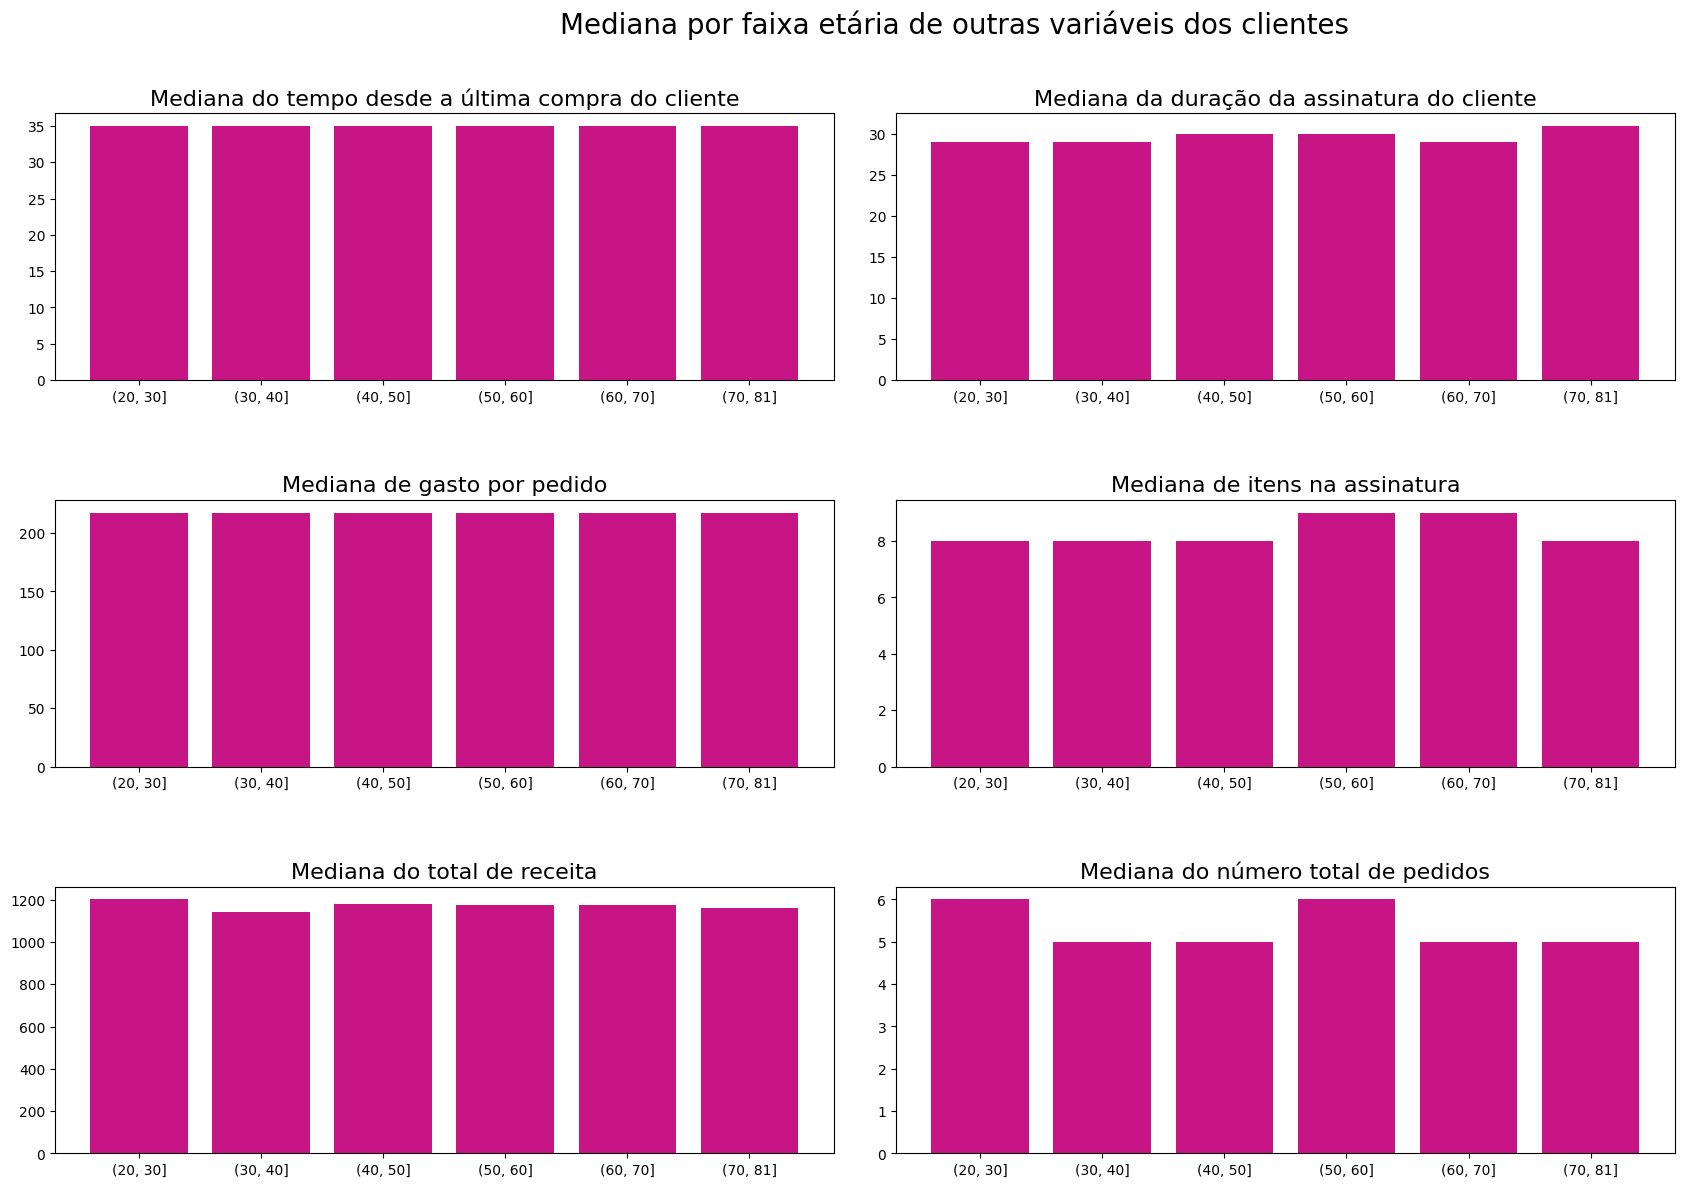

In [44]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 13))
# a linha de código abaixo tira a coluna age group do index para n dar erro no gráfico
table_customer_age.reset_index(inplace=True)
# lista de tuplas contendo o nome da variável e a coluna correspondente no dataframe
variables = [('Mediana do tempo desde a última compra do cliente', 'recency'),
             ('Mediana da duração da assinatura do cliente', 'subs_time'),
             ('Mediana de gasto por pedido', 'average_ticket'),
             ('Mediana de itens na assinatura', 'items_quantity'),
             ('Mediana do total de receita', 'all_revenue'),
             ('Mediana do número total de pedidos', 'all_orders')]
# loop para gerar cada subplot
for i, ax in enumerate(axes.flat):
    variable_name, variable_column = variables[i]
    ax.bar(table_customer_age['age_group'], table_customer_age[variable_column], color='mediumvioletred')
    ax.set_title(variable_name, fontsize=16)
plt.suptitle("Mediana por faixa etária de outras variáveis dos clientes", fontsize=20)
# ajuste da margem dos subplots
plt.subplots_adjust(left=0, bottom=0.1, right=0.9, top=0.9, wspace=0.08, hspace=0.45)
plt.show()

**Análise dos gráficos acima**  
Lembrando que a análise do gráfico acima contempla todos os clientes, os que cancelaram e os que não cancelaram.   
Analisando todos os gráficos não notamos diferenças que podem ser consideráveis entre as faixa etárias, ou seja, todas elas tem um comportanento similar em relação a compra e dinheiro gasto.

In [45]:
# criando um dataframe com as mesmas informações do table_customer_age, porém, apenas para clientes que cancelaram
table_customer_age_deleted = df.query('churn=="yes"').groupby('age_group').agg(**{
    'subs_time':pd.NamedAgg(column='subs_time',aggfunc='median'),
    'average_ticket':pd.NamedAgg(column='average_ticket',aggfunc='median'),
    'items_quantity':pd.NamedAgg(column='items_quantity',aggfunc='median'),
    'all_revenue':pd.NamedAgg(column='all_revenue',aggfunc='median'),
    'all_orders':pd.NamedAgg(column='all_orders',aggfunc='median'),
    'recency':pd.NamedAgg(column='recency',aggfunc='median')
    })

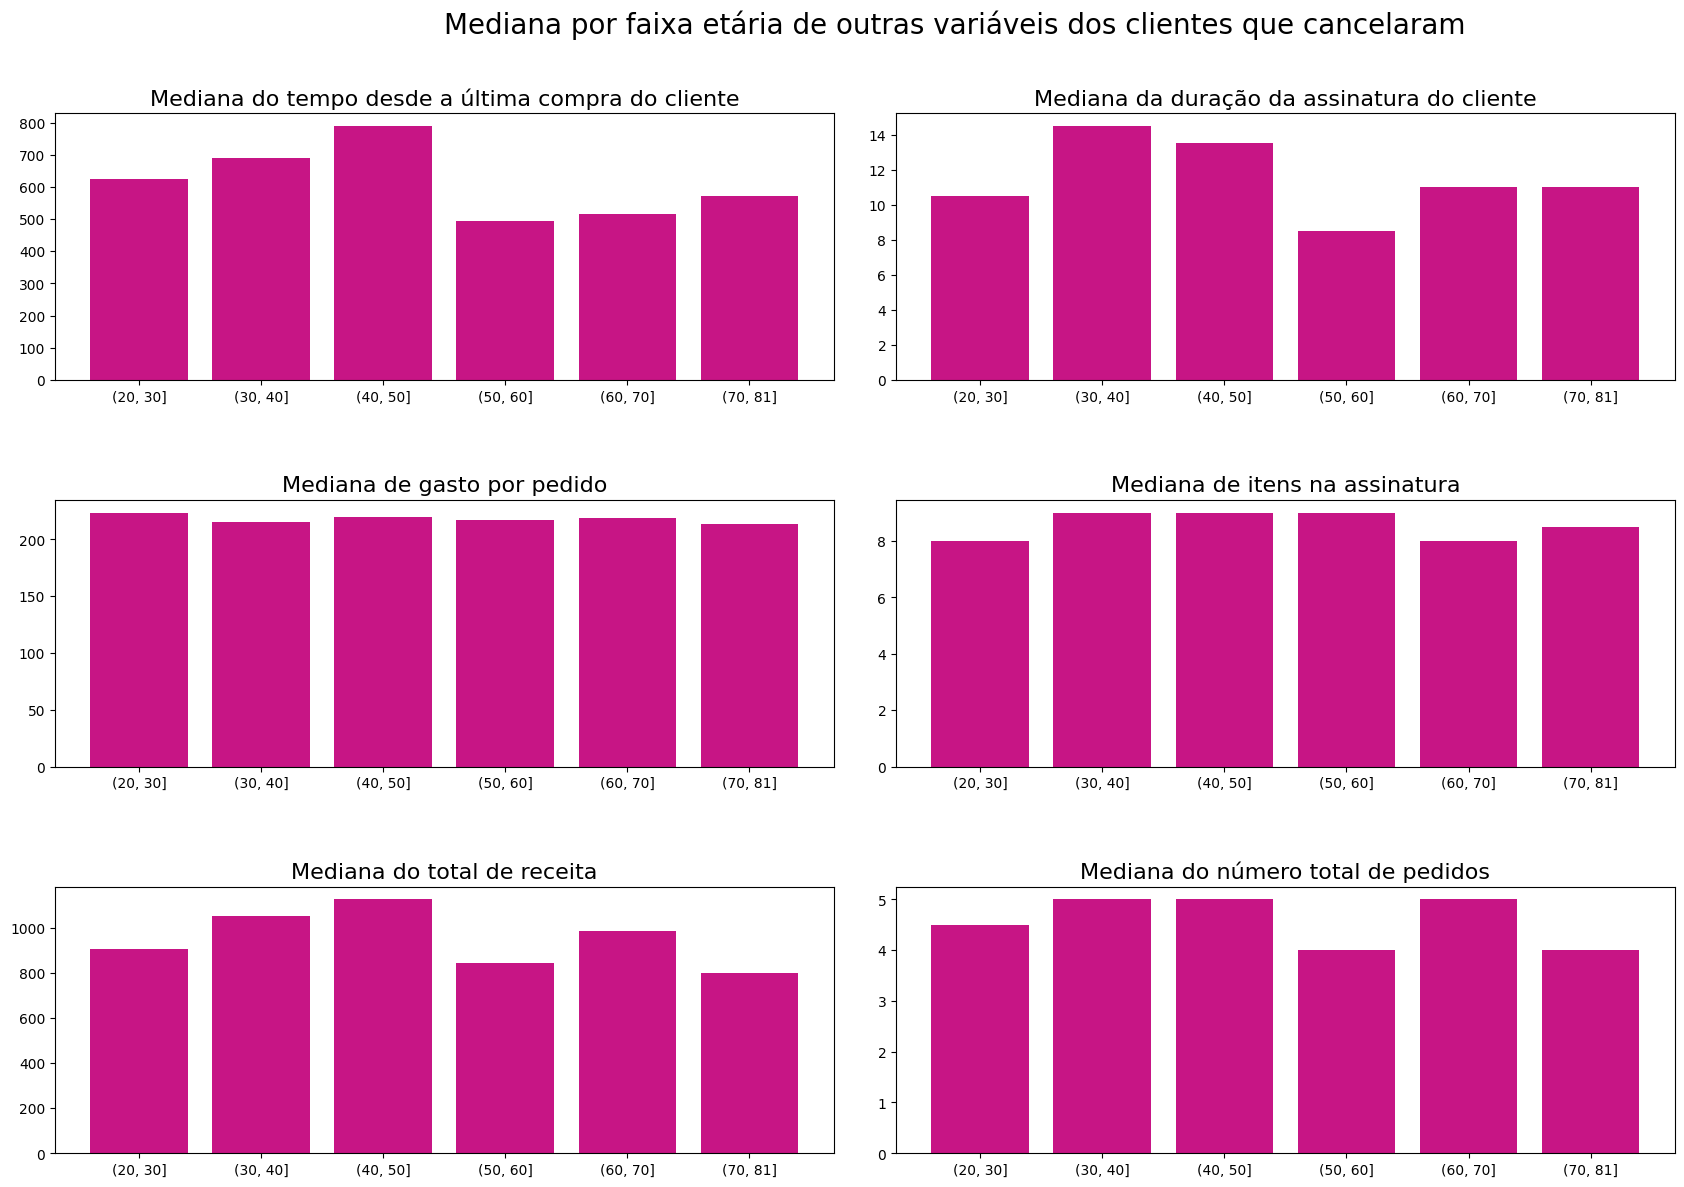

In [47]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 13))
# a linha de código abaixo tira a coluna age group do index para n dar erro no gráfico
table_customer_age_deleted.reset_index(inplace=True)
# lista de tuplas contendo o nome da variável e a coluna correspondente no dataframe
variables = [('Mediana do tempo desde a última compra do cliente', 'recency'),
             ('Mediana da duração da assinatura do cliente', 'subs_time'),
             ('Mediana de gasto por pedido', 'average_ticket'),
             ('Mediana de itens na assinatura', 'items_quantity'),
             ('Mediana do total de receita', 'all_revenue'),
             ('Mediana do número total de pedidos', 'all_orders')]
# loop para gerar cada subplot
for i, ax in enumerate(axes.flat):
    variable_name, variable_column = variables[i]
    ax.bar(table_customer_age_deleted['age_group'], table_customer_age_deleted[variable_column], color='mediumvioletred')
    ax.set_title(variable_name, fontsize=16)
plt.suptitle("Mediana por faixa etária de outras variáveis dos clientes que cancelaram", fontsize=20)
# ajuste da margem dos subplots
plt.subplots_adjust(left=0, bottom=0.1, right=0.9, top=0.9, wspace=0.08, hspace=0.45)
plt.show()

**Análise dos gráficos**  
Acima foram plotados os mesmos gráficos que anteriormente, porém, contém apenas os clientes que cancelaram para podermos visualizar o comportamento destes clientes.  
- Aqui vemos algumas diferenças entre as faixas etárias, por exemplo, em relação a duração da assinatura os clientes de 40 a 50 anos se destacam entre os outros, com uma mediana de mais de 14 meses. Seria interessante entender o motivo do cancelamento depois de tanto tempo do uso do serviço.  
- Outra variável curiosa é o total de receita gasto, a faixa etária mais experiente é a que menos gasta no total em comparação com as demais. Sendo uma mediana de total gasto de 800, contra 1126 dos clientes de 30 a 40.

#### Resumo  
Pensando no objetivo da equipe de Assinatura que é reduzir o churn, e pensando no contexto desta primeira análise o público alvo seria aquele entre 20 e 30 anos. Além do seu percentual de cancelamento ser mais acentuado em relação a sua quantidade total, é uma das faixa etárias que fica menos tempo com a assinatura antes de cancelar e uma das que menos gasta com os serviços da PetLove.  

### Canal de marketing

In [48]:
table_marketing_source = df.groupby('marketing_source').agg(**{
    'total':pd.NamedAgg(column='id',aggfunc='count'),
    'deleted_at_total':pd.NamedAgg(column='deleted_at',aggfunc='count'),
    'subs_time':pd.NamedAgg(column='subs_time',aggfunc='median'),
    'average_ticket':pd.NamedAgg(column='average_ticket',aggfunc='median'),
    'items_quantity':pd.NamedAgg(column='items_quantity',aggfunc='median'),
    'all_revenue':pd.NamedAgg(column='all_revenue',aggfunc='median'),
    'all_orders':pd.NamedAgg(column='all_orders',aggfunc='median'),
    'recency':pd.NamedAgg(column='recency',aggfunc='median')
    
})
table_marketing_source['perc_deleted_at'] = round(100*table_marketing_source['deleted_at_total']/table_marketing_source['total'],2)

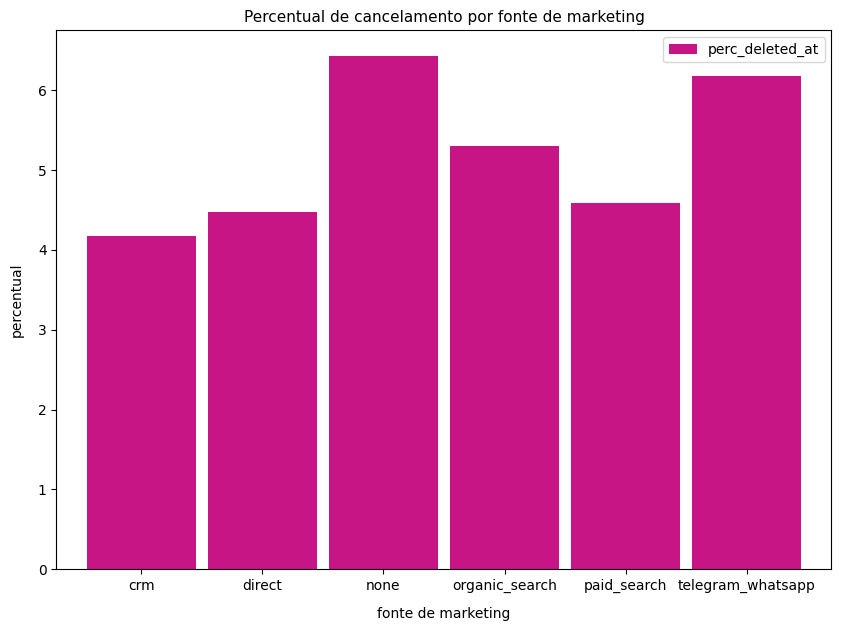

In [69]:
fig,ax= plt.subplots()
table_marketing_source[['perc_deleted_at']].plot(
    kind="bar", ax=ax, width=0.9, color='mediumvioletred',figsize=(10,7))
plt.title('Percentual de cancelamento por fonte de marketing', fontsize=11) 
plt.ylabel('percentual', labelpad=10)
plt.xlabel('fonte de marketing', labelpad=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

In [50]:
table_marketing_source

,total,deleted_at_total,subs_time,average_ticket,items_quantity,all_revenue,all_orders,recency,perc_deleted_at
marketing_source,,,,,,,,,
crm,1029,43,30.0,217.100115,8.0,1238.979006,6.0,35.0,4.18
direct,2149,96,30.0,217.389040,9.0,1166.707623,5.0,35.0,4.47
none,529,34,27.0,215.420970,8.0,1164.638180,5.0,35.0,6.43
organic_search,3699,196,30.0,216.998835,8.0,1162.977791,5.0,35.0,5.30
paid_search,1526,70,30.0,217.277319,8.0,1151.177066,5.0,35.0,4.59
telegram_whatsapp,1068,66,29.0,216.184098,9.0,1189.749338,6.0,35.0,6.18


In [70]:
# criando tabela de percentual de faixa etaria no cancelamneto
aux_4 = df.query('churn=="yes"')['marketing_source'].value_counts(normalize=True).to_frame().reset_index()
aux_4['proportion'] = round(100*aux_4['proportion'],2)
# criando tabela de percentual de faixa etaria no total
aux_5 = df['marketing_source'].value_counts(normalize=True).to_frame().reset_index()
aux_5['proportion'] = round(100*aux_5['proportion'],2)
# plotando o merge destas tabelas para comparação
aux_6 = aux_5.merge(aux_4,how='inner',on='marketing_source').rename(columns={'proportion_x':'perc_customers',
                                                              'proportion_y':'perc_customers_deleted'})
aux_6['dif'] = aux_6['perc_customers_deleted']-aux_6['perc_customers']
display_side_by_side( aux_6.rename(columns={'marketing_source':'canal de marketing','perc_customers':'percentual de clientes',
                    'perc_customers_deleted':'percentual de clientes churn','dif':'diferença de percentual'}),
                     titles=['Percentual de clientes em cada canal de marketing na nossa base de clientes e no cancelamento'])

,canal de marketing,percentual de clientes,percentual de clientes churn,diferença de percentual
0,organic_search,36.99,38.81,1.82
1,direct,21.49,19.01,-2.48
2,paid_search,15.26,13.86,-1.40
3,telegram_whatsapp,10.68,13.07,2.39
4,crm,10.29,8.51,-1.78
5,none,5.29,6.73,1.44


#### Resumo
Através do gráfico conseguimos identificar uma maior taxa de cancelamento dentro dos clientes vindos da fonte de marketing None (6,43%) e Telegram/Whatsapp (6,18%). Considerando que a fonte "None" seja desconhecida, não temos muito controle sobre ela. Poderiam ser tomadas ações ao redor desta fonte, buscando uma forma de desvendar sua real origem. Porém, nesta análise iremos considerar o Telegram/Whatsapp como sendo a fonte que os clientes mais cancelam.  
Se formos fazer uma comparação entre o percentual de clientes de certa fonte de marketing, com seu percentual de cancelamento, o Telegram/Whatsapp continua sendo a pior origem neste aspecto. Ele correspode a 10,68% da base de clientes, mas em relação a cancelamento correspode a 13,07%. Portanto, apesar de ser um percentual mais baixo na base, da mais cancelamento do que deveria em tese.  
A partir disso, poderíamos destinar uma pesquisa à estes clientes pelo canal que foram cativados, questionando o motivo de sua saída.  Para reduzir o churn deveríamos focar nesta classe de clientes.


### Região

In [52]:
table_region = df.groupby('region').agg(**{
    'total':pd.NamedAgg(column='id',aggfunc='count'),
    'deleted_at_total':pd.NamedAgg(column='deleted_at',aggfunc='count'),
    'subs_time':pd.NamedAgg(column='subs_time',aggfunc='median'),
    'average_ticket':pd.NamedAgg(column='average_ticket',aggfunc='median'),
    'items_quantity':pd.NamedAgg(column='items_quantity',aggfunc='median'),
    'all_revenue':pd.NamedAgg(column='all_revenue',aggfunc='median'),
    'all_orders':pd.NamedAgg(column='all_orders',aggfunc='median'),
    'recency':pd.NamedAgg(column='recency',aggfunc='median')
    
})
table_region['perc_deleted_at'] = round(100*table_region['deleted_at_total']/table_region['total'],2)

In [53]:
table_region

,total,deleted_at_total,subs_time,average_ticket,items_quantity,all_revenue,all_orders,recency,perc_deleted_at
region,,,,,,,,,
Centro-Oeste,1502,80,29.0,216.448572,8.0,1155.892632,5.0,35.0,5.33
Nordeste,3250,168,30.0,217.123361,8.0,1169.810289,5.0,35.0,5.17
Norte,2655,140,30.0,217.992937,8.0,1176.091537,5.0,35.0,5.27
Sudeste,1456,63,29.0,215.610672,9.0,1191.880792,6.0,35.0,4.33
Sul,1137,54,31.0,216.016153,8.0,1166.412022,5.0,35.0,4.75


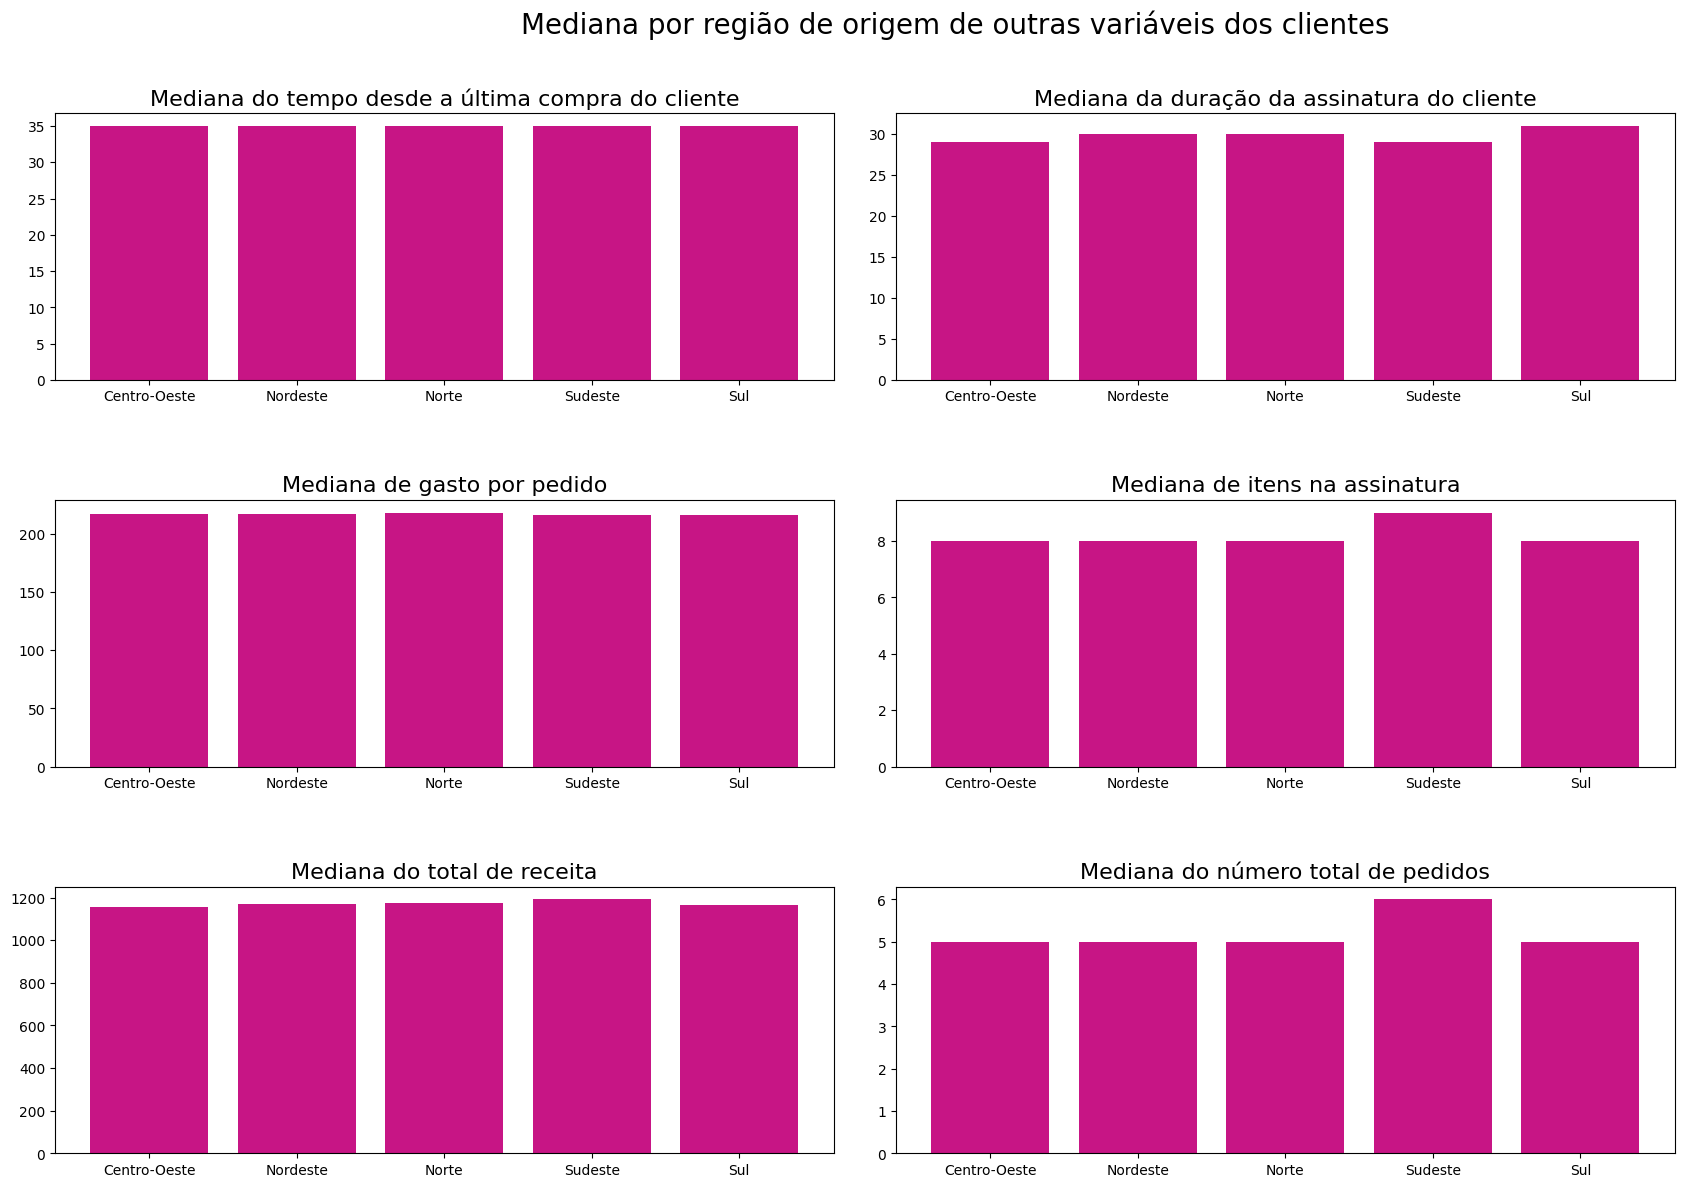

In [54]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 13))
# a linha de código abaixo tira a coluna age group do index para n dar erro no gráfico
table_region.reset_index(inplace=True)
# lista de tuplas contendo o nome da variável e a coluna correspondente no dataframe
variables = [('Mediana do tempo desde a última compra do cliente', 'recency'),
             ('Mediana da duração da assinatura do cliente', 'subs_time'),
             ('Mediana de gasto por pedido', 'average_ticket'),
             ('Mediana de itens na assinatura', 'items_quantity'),
             ('Mediana do total de receita', 'all_revenue'),
             ('Mediana do número total de pedidos', 'all_orders')]
# loop para gerar cada subplot
for i, ax in enumerate(axes.flat):
    variable_name, variable_column = variables[i]
    ax.bar(table_region['region'], table_region[variable_column], color='mediumvioletred')
    ax.set_title(variable_name, fontsize=16)
plt.suptitle("Mediana por região de origem de outras variáveis dos clientes", fontsize=20)
# ajuste da margem dos subplots
plt.subplots_adjust(left=0, bottom=0.1, right=0.9, top=0.9, wspace=0.08, hspace=0.45)
plt.show()

In [55]:
# criando tabela de percentual de faixa etaria no cancelamneto
aux_7 = df.query('churn=="yes"')['region'].value_counts(normalize=True).to_frame().reset_index()
aux_7['proportion'] = round(100*aux_7['proportion'],2)
# criando tabela de percentual de faixa etaria no total
aux_8 = df['region'].value_counts(normalize=True).to_frame().reset_index()
aux_8['proportion'] = round(100*aux_8['proportion'],2)
# plotando o merge destas tabelas para comparação
aux_9 = aux_8.merge(aux_7,how='inner',on='region').rename(columns={'proportion_x':'perc_customers',
                                                              'proportion_y':'perc_customers_deleted'})
aux_9['dif'] = aux_9['perc_customers_deleted']-aux_9['perc_customers']
display_side_by_side( aux_9,
                     titles=['Percentual de clientes em cada região na nossa base de clientes e no cancelamento'])

,region,perc_customers,perc_customers_deleted,dif
0,Nordeste,32.50,33.27,0.77
1,Norte,26.55,27.72,1.17
2,Centro-Oeste,15.02,15.84,0.82
3,Sudeste,14.56,12.48,-2.08
4,Sul,11.37,10.69,-0.68


In [56]:
# criando um dataframe com as mesmas informações do table_customer_age, porém, apenas para clientes que cancelaram
table_region_deleted = df.query('churn=="yes"').groupby('region').agg(**{
    'subs_time':pd.NamedAgg(column='subs_time',aggfunc='median'),
    'average_ticket':pd.NamedAgg(column='average_ticket',aggfunc='median'),
    'items_quantity':pd.NamedAgg(column='items_quantity',aggfunc='median'),
    'all_revenue':pd.NamedAgg(column='all_revenue',aggfunc='median'),
    'all_orders':pd.NamedAgg(column='all_orders',aggfunc='median'),
    'recency':pd.NamedAgg(column='recency',aggfunc='median')
    })

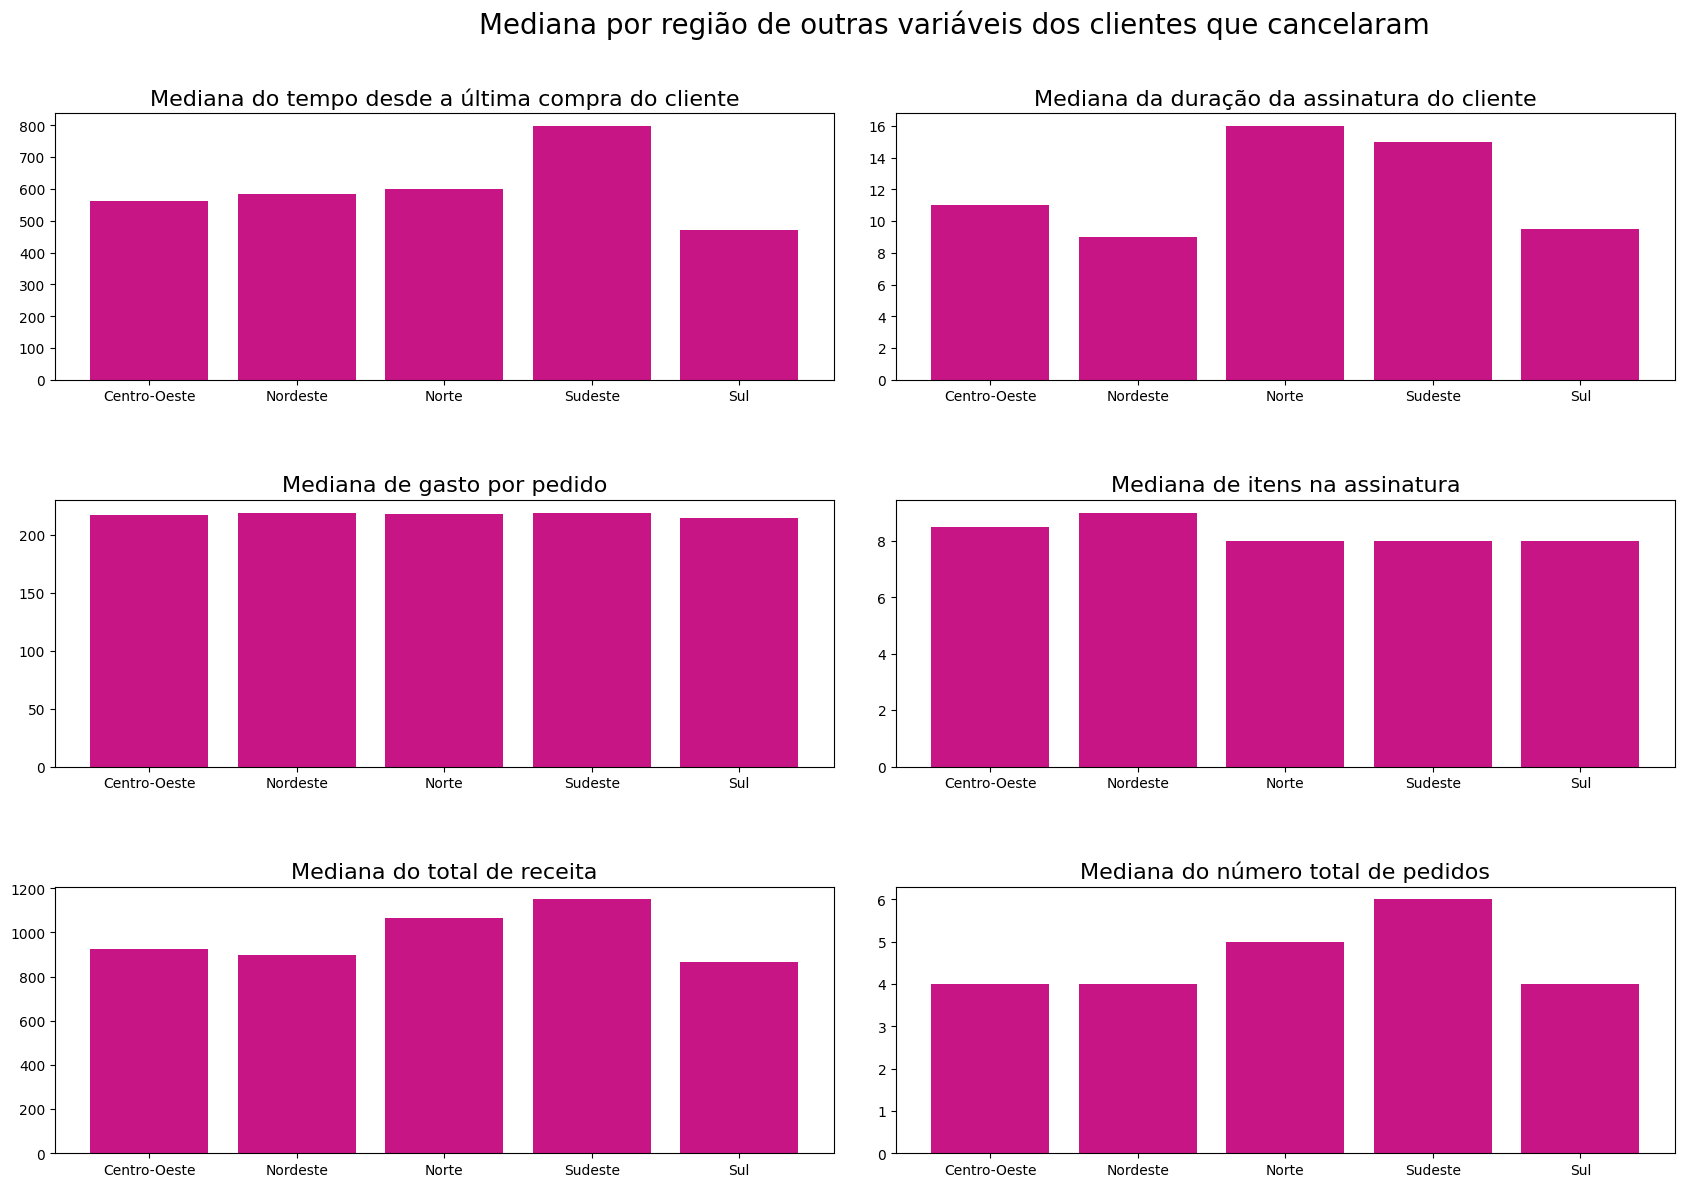

In [57]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 13))
# a linha de código abaixo tira a coluna age group do index para n dar erro no gráfico
table_region_deleted.reset_index(inplace=True)
# lista de tuplas contendo o nome da variável e a coluna correspondente no dataframe
variables = [('Mediana do tempo desde a última compra do cliente', 'recency'),
             ('Mediana da duração da assinatura do cliente', 'subs_time'),
             ('Mediana de gasto por pedido', 'average_ticket'),
             ('Mediana de itens na assinatura', 'items_quantity'),
             ('Mediana do total de receita', 'all_revenue'),
             ('Mediana do número total de pedidos', 'all_orders')]
# loop para gerar cada subplot
for i, ax in enumerate(axes.flat):
    variable_name, variable_column = variables[i]
    ax.bar(table_region_deleted['region'], table_region_deleted[variable_column], color='mediumvioletred')
    ax.set_title(variable_name, fontsize=16)
plt.suptitle("Mediana por região de outras variáveis dos clientes que cancelaram", fontsize=20)
# ajuste da margem dos subplots
plt.subplots_adjust(left=0, bottom=0.1, right=0.9, top=0.9, wspace=0.08, hspace=0.45)
plt.show()

#### Resumo
Fazendo uma breve análise por região de origem dos clientes, não vemos tendências em determinadas regiões específicas olhando para o todo. Porém, vendo apenas o caso dos clientes que cancelaram a assinatura vemos algumas informações relevantes.  
O sudeste parece ser a região mais rentável, com um valor mediano maior de receita, número maior de pedidos e o segundo maior tempo mediano de duração de assinatura. Se fosse realizada uma ação com objetivo de redução de churn e alguns clientes precisassem ser priorizados por motivo de baixo recurso, por exemplo, poderíamos priorizar as duas regiões mais rentáveis Norte e Sudeste.

### Comportamento sazonal

In [58]:
# criando um dataframe com ano e mês de exclusão 
table_month_year_deleted = df.pivot_table(values = 'id', index = ['deleted_at_month'], columns = 'deleted_at_year',
    aggfunc='count').fillna(0).reset_index().rename_axis(index=None, columns= None).set_index('deleted_at_month')
# pro grafico ficar na ordem correta
table_month_year_deleted['seq'] = [4,8,12,2,1,7,6,3,5,11,10,9]
table_month_year_deleted.sort_values('seq',inplace=True)
# renomeando os anos que estão em float
table_month_year_deleted.rename(columns={2016.0:'2016',2017.0:'2017',2018.0:'2018',2019.0:'2019',2020.0:'2020',
                                             2021.0:'2021'},inplace=True)

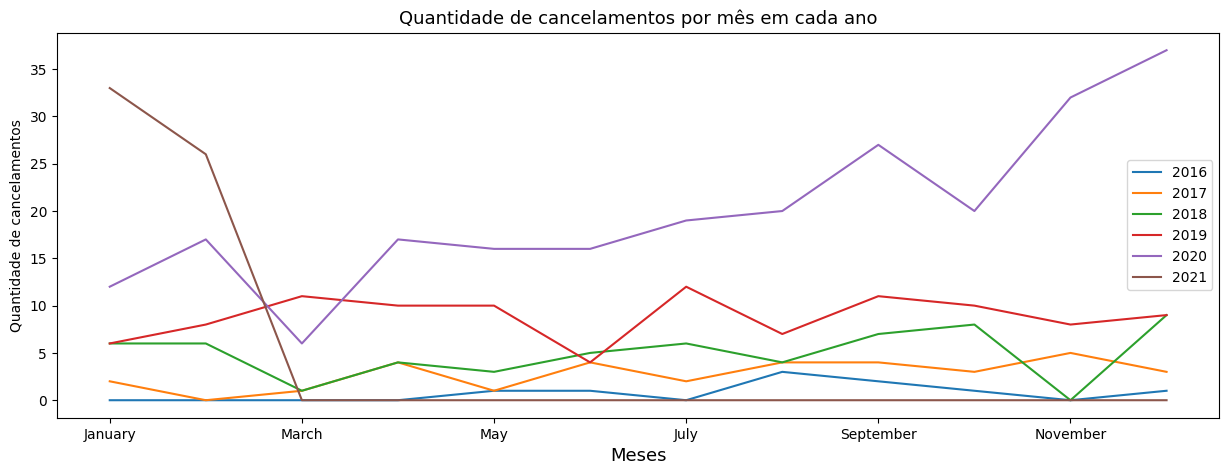

In [59]:
aux = table_month_year_deleted.drop('seq',axis=1).plot(figsize=(15, 5))
plt.ylabel('Quantidade de cancelamentos')
plt.xlabel('Meses',fontsize=13)
plt.legend(['2016','2017','2018','2019','2020','2021'],loc=0)
plt.title("Quantidade de cancelamentos por mês em cada ano",fontsize=13)
plt.show()

In [60]:
# criando um dataframe com dia e mês de exclusão 
table_month_day_deleted = df.pivot_table(values = 'id', index = ['deleted_at_day'], columns = 'deleted_at_month',
    aggfunc='count').fillna(0).reset_index().rename_axis(index=None, columns= None)[['deleted_at_day','January','February',
   'March','April','May','June','July','August','September','October','November','December']]
# transformando a coluna que ta em float pra int e colocando-a como index
table_month_day_deleted['deleted_at_day'] = table_month_day_deleted['deleted_at_day'].astype(int)
table_month_day_deleted.set_index('deleted_at_day',inplace=True)

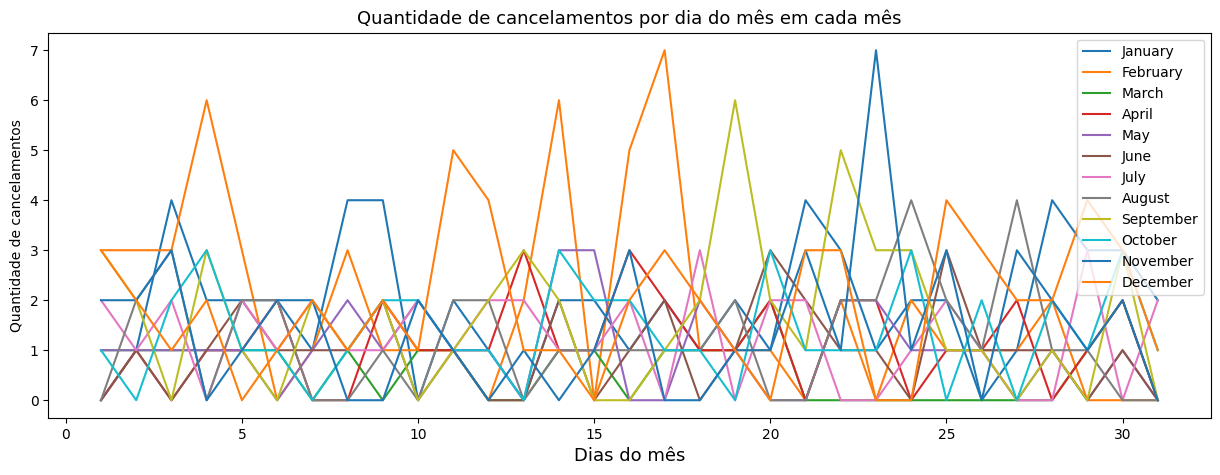

In [61]:
aux = table_month_day_deleted.plot(figsize=(15, 5))
plt.ylabel('Quantidade de cancelamentos')
plt.xlabel('Dias do mês',fontsize=13)
plt.legend(['January','February','March','April','May','June','July','August','September','October','November','December'],loc=0)
plt.title("Quantidade de cancelamentos por dia do mês em cada mês",fontsize=13)
plt.show()

In [62]:
# criando um dataframe com dia da semana e mês de exclusão 
table_month_weekday_deleted = df.pivot_table(values = 'id', index = ['deleted_at_weekday'], columns = 'deleted_at_month',
    aggfunc='count').fillna(0).reset_index().rename_axis(index=None, columns= None).set_index('deleted_at_weekday')
# pro grafico ficar na ordem correta
table_month_weekday_deleted['seq'] = [4,0,5,6,3,1,2]
table_month_weekday_deleted.sort_values('seq',inplace=True)

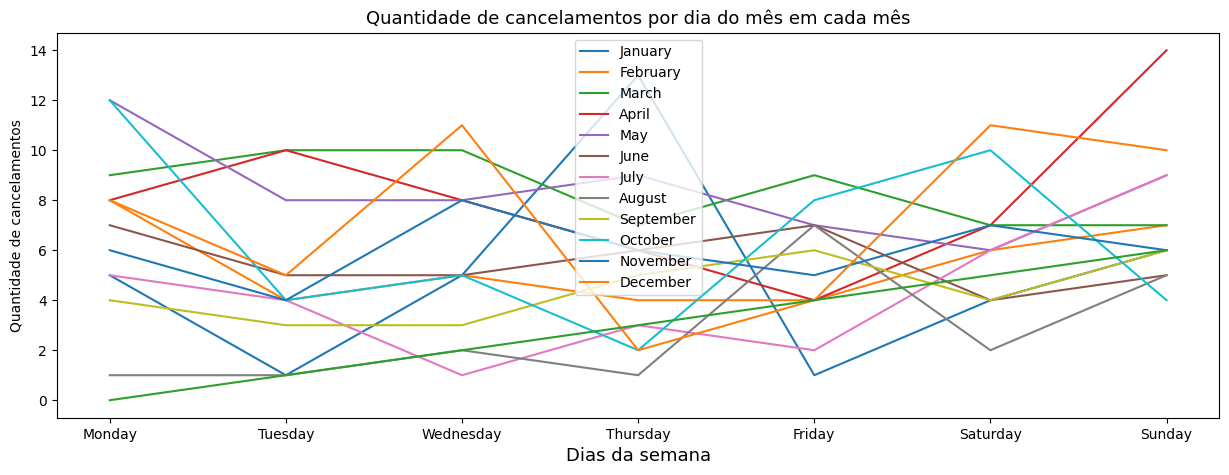

In [63]:
aux = table_month_weekday_deleted.plot(figsize=(15, 5))
plt.ylabel('Quantidade de cancelamentos')
plt.xlabel('Dias da semana',fontsize=13)
plt.legend(['January','February','March','April','May','June','July','August','September','October','November','December'],loc=0)
plt.title("Quantidade de cancelamentos por dia do mês em cada mês",fontsize=13)
plt.show()

#### Resumo  
Não há um padrão visível nos dados por mês e por dia do mês, por conta do tamanho da amostra ser pequeno (em relação a cancelados) e o período ser grande a visualização de padrões e tendências fica prejudicada. Poderia ser feita uma análise percentual mas os valores ficariam extremos por conta da baixa quantidade quando agrupado por mês ou dia.  
Agrupando por dia da semana conseguimos uma visualização melhor e com mais dados. O que esperava ver era um padrão de comportamento de cancelamento em algum dia da semana, ou final de semana, para assim desenhar ações em dias específicos. Porém, nenhuma tendência se desenhou e consideramos que os clientes cancelam em qualquer dia da semana.